# assignment 4
Implement Agglomerative hierarchical clustering algorithm using appropriate dataset. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

In [3]:
# Load the dataset
data = pd.read_csv('penguins.csv')  # Replace 'your_dataset.csv' with the actual filename

In [6]:
# Step 2: Loading and Cleaning the data
X = data[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
X = X.fillna(method='ffill')  # Use 'fillna' directly on X to avoid the warning

In [7]:
# Step 3: Preprocessing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_normalized = normalize(X_scaled)
X_normalized = pd.DataFrame(X_normalized)

In [8]:
# Step 4: Reducing the dimensionality of the Data
pca = PCA(n_components=2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

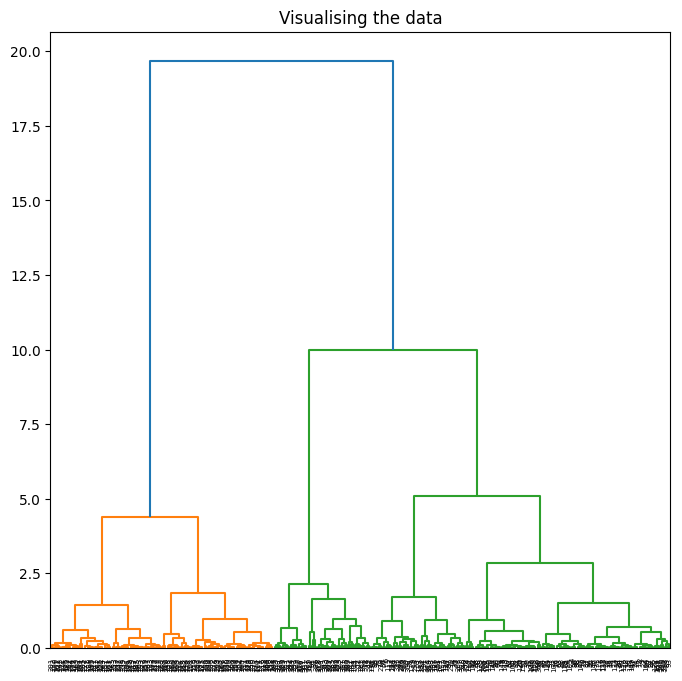

In [9]:
# Step 5: Visualizing the working of the Dendrograms
plt.figure(figsize=(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram(shc.linkage(X_principal, method='ward'))
plt.show()

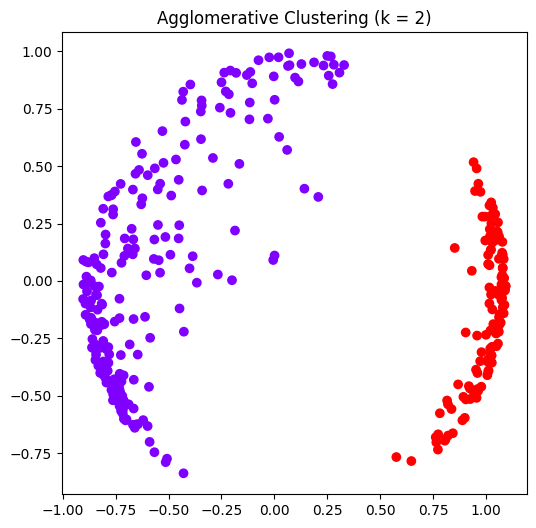

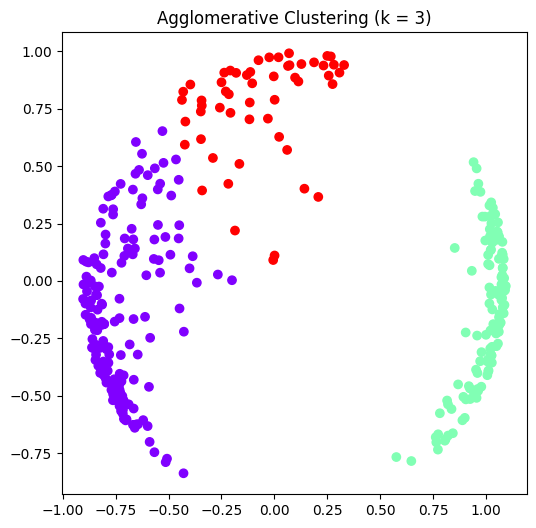

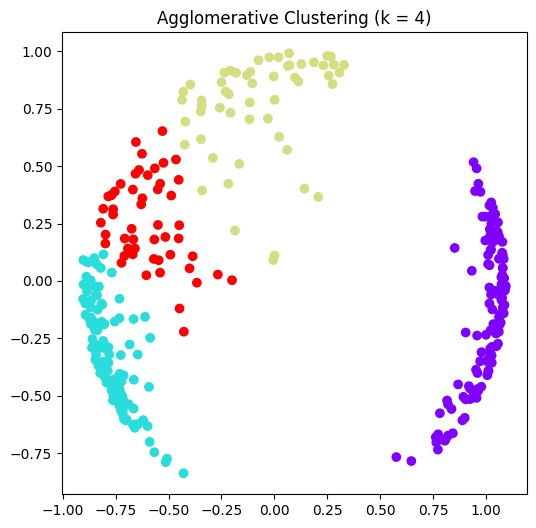

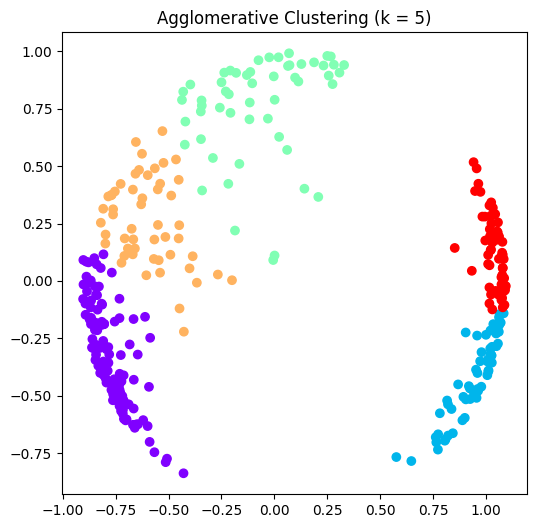

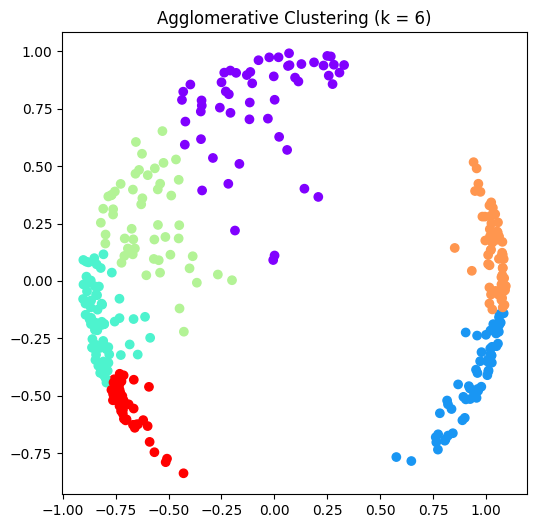

In [10]:
# Step 6: Building and Visualizing the different clustering models for different values of k
a_c_values = [2, 3, 4, 5, 6]
for num_clusters in a_c_values:
    ac = AgglomerativeClustering(n_clusters=num_clusters)
    plt.figure(figsize=(6, 6))
    plt.scatter(X_principal['P1'], X_principal['P2'], c=ac.fit_predict(X_principal), cmap='rainbow')
    plt.title(f'Agglomerative Clustering (k = {num_clusters})')
    plt.show()

In [11]:
# Step 7: Evaluating the different models and Visualizing the results
silhouette_scores = []
for num_clusters in a_c_values:
    ac = AgglomerativeClustering(n_clusters=num_clusters)
    silhouette_scores.append(silhouette_score(X_principal, ac.fit_predict(X_principal)))

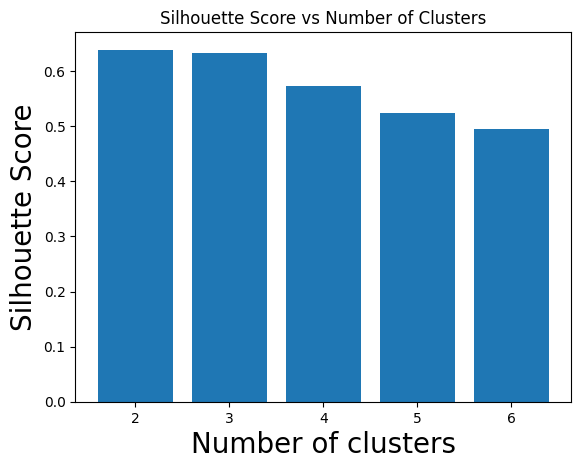

In [12]:
plt.bar(a_c_values, silhouette_scores)
plt.xlabel('Number of clusters', fontsize=20)
plt.ylabel('Silhouette Score', fontsize=20)
plt.title('Silhouette Score vs Number of Clusters')
plt.show()